# Tutorial 1, solutions


This solution is a jupyter notebook which allows you to directly interact with
the code so that you can see the effect of any changes you may like to make.

Author: Nicky van Foreest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

plt.ion()  # you can skip this, I only use it for testing
           # purposes so that the computer skips making the graphs.

# this is to print not too many digits to the screen
np.set_printoptions(precision=3)

# fix the seed
scipy.random.seed(3)

{0: 0.0, 1: 0.0, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.6666666666666666, 5: 0.6666666666666666, 6: 0.6666666666666666, 7: 0.6666666666666666, 8: 0.6666666666666666, 9: 1.0}


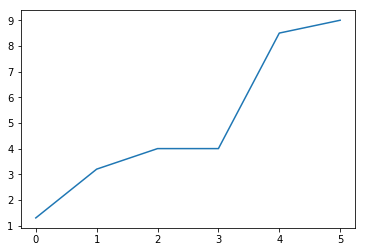

In [2]:
def cdf_simple(a):
    a = sorted(a)

    # We need the support of the distribution. For this, we need
    # to start slightly to the left of the smallest value of a,
    # and stop somewhat to the right of the largest value of a. This is
    # realized by defining m and M like so:
    m, M = int(min(a)), int(max(a)) + 1
    # Since we know that a is sorted, this next line
    # would be better, but less clear perhaps:
    # m, M = int(a[0]), int(a[-1])+1

    F = dict()  # store the function i -> F[i]
    F[m - 1] = 0  # since F[x] = 0 for all x < m
    i = 0
    for x in range(m, M):
        F[x] = F[x - 1]
        while i < len(a) and a[i] <= x:
            F[x] += 1
            i += 1

    # normalize
    for x in F.keys():
        F[x] /= len(a)

    return F


def test1():
    a = [3.2, 4, 4, 1.3, 8.5, 9]

    F = cdf_simple(a)
    print(F)
    I = range(0, len(a))
    s = sorted(a)
    plt.plot(I, s)
    plt.show()


"""
You can run a separate test, such as test1 by uncommenting the line
below, i.e., remove the # at the start of the line and the space, so
that the line starts with the word "test_1()". Once the test runs, you
can comment it again, and move to the next test. Uncomment that line,
run the program, comment it again, etc.
"""

test1()

In [3]:
    # Include this void code to keep the numbering the same between
    # the tutorial text and the jupyter notebook.

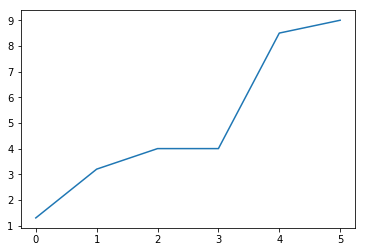

In [4]:
def test1a():
    a = [3.2, 4, 4, 1.3, 8.5, 9]
    I = range(0, len(a))
    s = sorted(a)
    plt.plot(I, s)
    plt.show()


test1a()

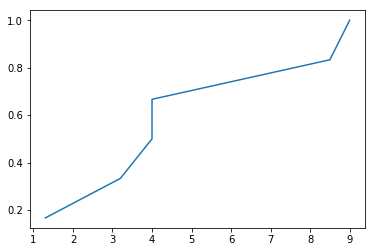

In [5]:
def cdf_better(a):
    n = len(a)
    y = range(1, n + 1)
    y = [z / n for z in y]  # normalize
    x = sorted(a)
    return x, y


def test2():
    a = [3.2, 4, 4, 1.3, 8.5, 9]

    x, y = cdf_better(a)

    plt.plot(x, y)
    plt.show()


test2()

In [6]:
    # Include this void code to keep the numbering the same between the tutorial
    # text and the jupyter notebook.

In [7]:
def cdf(a):  # the implementation we will use mostly. It is simple and fast.
    y = np.arange(1, len(a) + 1) / len(a)
    x = np.sort(a)
    return x, y

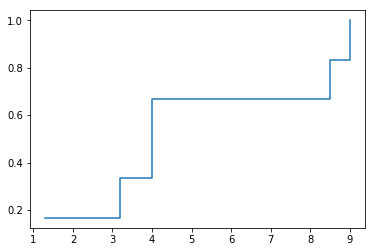

In [8]:
def make_nice_plots_1():
    a = [3.2, 4, 4, 1.3, 8.5, 9]

    x, y = cdf(a)

    plt.plot(x, y, drawstyle="steps-post")
    plt.show()


make_nice_plots_1()

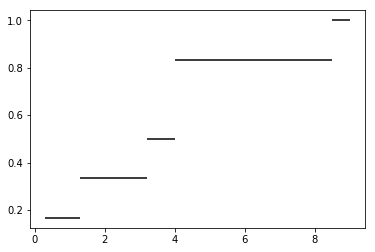

In [9]:
def make_nice_plots_2():
    a = [3.2, 4, 4, 1.3, 8.5, 9]

    x, y = cdf(a)

    left = np.concatenate(([x[0] - 1], x))
    right = np.concatenate((x, [x[-1] + 1]))

    plt.hlines(y, left, right)
    plt.show()


make_nice_plots_2()

In [10]:
def cdf_fastest(X):
    # remove multiple occurences of the same value
    unique, count = np.unique(np.sort(X), return_counts=True)
    x = unique
    y = count.cumsum() / count.sum()
    return x, y

In [11]:
from scipy.stats import uniform

# fix the seed
scipy.random.seed(3)


def simulation_1():
    L = 3  # number of interarrival times
    G = uniform(loc=4, scale=2)  # G is called a frozen distribution.
    a = G.rvs(L)
    print(a)


simulation_1()

[5.102 5.416 4.582]


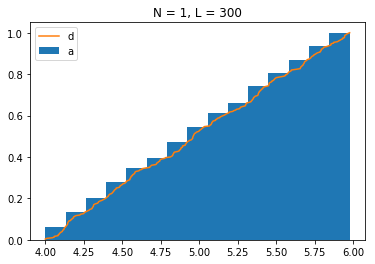

In [12]:
def simulation_2():
    N = 1  # number of customers
    L = 300

    G = uniform(loc=4, scale=2)
    a = G.rvs(L)

    plt.hist(a, bins=int(L / 20), label="a", density=True, cumulative=True)
    plt.title("N = {}, L = {}".format(N, L))

    x, y = cdf(a)
    plt.plot(x, y, label="d")
    plt.legend()
    plt.show()


simulation_2()

In [13]:
def KS(X, F):
    # Compute the Kolmogorov-Smirnov statistic where
    # X are the data points
    # F is the theoretical distribution
    support, y = cdf(X)
    y_theo = np.array([F.cdf(x) for x in support])
    return np.max(np.abs(y - y_theo))


def simulation_3():
    N = 1  # number of customers
    L = 300

    G = uniform(loc=4, scale=2)
    a = G.rvs(L)

    print(KS(a, G))


simulation_3()

0.03609324778768652


5.0
0.05074958906379376


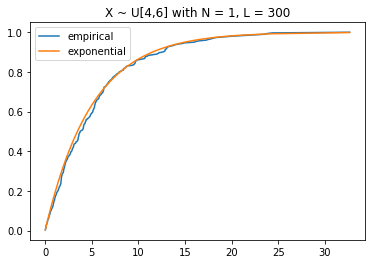

In [14]:
from scipy.stats import expon


def plot_distributions(x, y, N, L, dist, dist_name):
    # plot the empirical cdf and the theoretical cdf in one figure
    plt.title("X ~ {} with N = {}, L = {}".format(dist_name, N, L))
    plt.plot(x, y, label="empirical")
    plt.plot(x, dist.cdf(x), label="exponential")
    plt.legend()
    plt.show()


def simulation_4():
    N = 1  # number of customers
    L = 300

    labda = 1.0 / 5  # lambda is a function in python. Hence we write labda
    E = expon(scale=1.0 / labda)
    print(E.mean())  # to check that we chose the right scale
    a = E.rvs(L)

    print(KS(a, E))
    x, y = cdf(a)
    dist_name = "U[4,6]"

    plot_distributions(x, y, N, L, E, dist_name)


simulation_4()

In [15]:
def compute_arrivaltimes(a):
    A = [0]
    i = 1
    for x in a:
        A.append(A[i - 1] + x)
        i += 1
    return A


def shop_1():
    a = [4, 3, 1.2, 5]
    b = [2, 0.5, 9]
    A = compute_arrivaltimes(a)
    B = compute_arrivaltimes(b)

    times = [0] + sorted(A[1:] + B[1:])
    print(times)


shop_1()

[0, 2, 2.5, 4, 7, 8.2, 11.5, 13.2]


In [16]:
from itertools import chain


def superposition(a):
    A = np.cumsum(a, axis=1)
    A = list(sorted(chain.from_iterable(A)))
    return np.diff(A)

1.6666666666666665


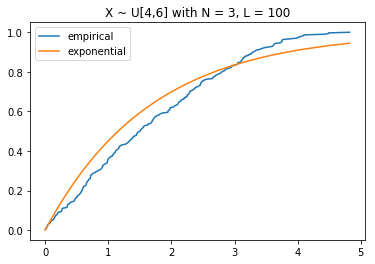

0.10470216965873624


In [17]:
def shop_3():
    N, L = 3, 100
    G = uniform(loc=4, scale=2)
    a = superposition(G.rvs((N, L)))

    labda = 1.0 / 5
    E = expon(scale=1.0 / (N * labda))
    print(E.mean())

    x, y = cdf(a)
    dist_name = "U[4,6]"
    plot_distributions(x, y, N, L, E, dist_name)

    print(KS(a, E))  # Compute KS statistic using the function defined earlier


shop_3()

0.5


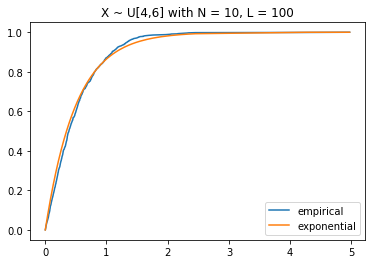

0.05862318546286949


In [18]:
def shop_4():
    N, L = 10, 100
    G = uniform(loc=4, scale=2)  # G is called a frozen distribution.
    a = superposition(G.rvs((N, L)))

    labda = 1.0 / 5
    E = expon(scale=1.0 / (N * labda))
    print(E.mean())

    x, y = cdf(a)
    dist_name = "U[4,6]"
    plot_distributions(x, y, N, L, E, dist_name)

    print(KS(a, E))


shop_4()

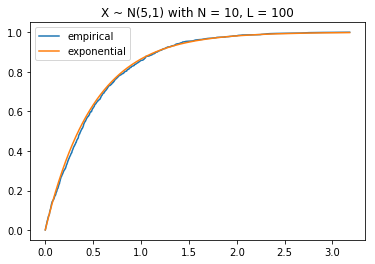

0.0344878475087837


In [19]:
from scipy.stats import norm


def shop_5():
    N, L = 10, 100
    G = norm(loc=5, scale=1)
    a = superposition(G.rvs((N, L)))

    labda = 1.0 / 5
    E = expon(scale=1.0 / (N * labda))

    x, y = cdf(a)
    dist_name = "N(5,1)"
    plot_distributions(x, y, N, L, E, dist_name)

    print(KS(a, E))


shop_5()

In [20]:
# keep the numbering

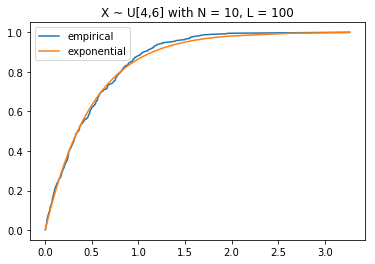

0.030020985423022117


In [21]:
def memoryless_1():
    N, L = 10, 100
    G = uniform(loc=4, scale=2)  # G is called a frozen distribution.
    a = superposition(G.rvs((N, L)))

    s = 0.5  # threshold
    a = a[a > s]  # select the interarrival times longer than x
    a -= s  # shift, check what happens if you don't include this line.
    x, y = cdf(a)

    labda = 1.0 / 5
    E = expon(scale=1.0 / (N * labda))

    dist_name = "U[4,6]"
    plot_distributions(x, y, N, L, E, dist_name)

    print(KS(a, E))


memoryless_1()

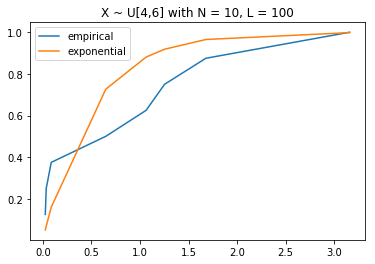

0.25580060508508606


In [22]:
def memoryless_2():
    N, L = 10, 100
    G = uniform(loc=4, scale=2)  # G is called a frozen distribution.
    a = superposition(G.rvs((N, L)))

    s = 2  # threshold
    a = a[a > s]  # select the interarrival times longer than x
    a -= s  # shift, check what happens if you don't include this line.
    x, y = cdf(a)

    labda = 1.0 / 5
    E = expon(scale=1.0 / (N * labda))

    dist_name = "U[4,6]"
    plot_distributions(x, y, N, L, E, dist_name)

    print(KS(a, E))


memoryless_2()

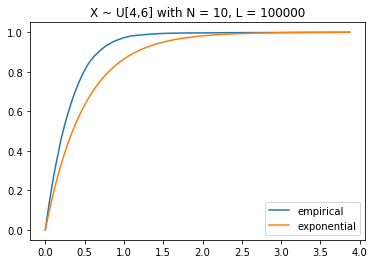

0.1764330976546311


In [23]:
def memoryless_3():
    N, L = 10, 100_000
    G = uniform(loc=4, scale=2)  # G is called a frozen distribution.
    a = superposition(G.rvs((N, L)))

    s = 2  # threshold
    a = a[a > s]  # select the interarrival times longer than x
    a -= s  # shift, check what happens if you don't include this line.
    x, y = cdf(a)

    labda = 1.0 / 5
    E = expon(scale=1.0 / (N * labda))

    dist_name = "U[4,6]"
    plot_distributions(x, y, N, L, E, dist_name)

    print(KS(a, E))


memoryless_3()

In [24]:
# keep the numbering

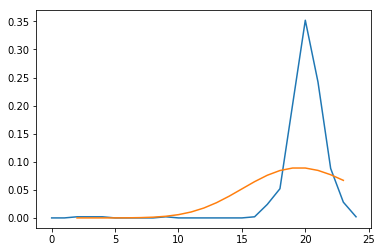

In [25]:
def poisson_1():
    N, L = 10, 1000
    G = uniform(loc=4, scale=2)  # G is called a frozen distribution.
    # G = norm(loc=5, scale=1)
    A = np.cumsum(G.rvs((N, L)), axis=1)  # step 1
    A = np.sort(A.flatten())  # step 2

    mean = 20  # specify the number of arrivals per interval
    bins = N * L // mean  # step 3
    p, x = np.histogram(A, bins)

    P = np.bincount(p)
    P = P / float(P.sum())  # normalize
    support = range(p.min(), p.max())

    plt.plot(P)
    plt.plot(support, scipy.stats.poisson.pmf(support, mean))
    # plt.pause(10)
    plt.show()


poisson_1()

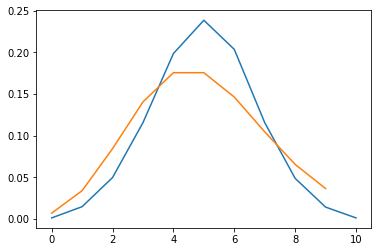

In [26]:
def poisson_2():
    N, L = 10, 1000
    G = uniform(loc=4, scale=2)  # G is called a frozen distribution.
    # G = norm(loc=5, scale=1)
    A = np.cumsum(G.rvs((N, L)), axis=1)  # step 1
    A = np.sort(A.flatten())  # step 2

    mean = 5  # specify the number of arrivals per interval
    bins = N * L // mean  # step 3
    p, x = np.histogram(A, bins)

    P = np.bincount(p)
    P = P / float(P.sum())  # normalize
    support = range(p.min(), p.max())

    plt.plot(P)
    plt.plot(support, scipy.stats.poisson.pmf(support, mean))
    # plt.pause(10)
    plt.show()


poisson_2()

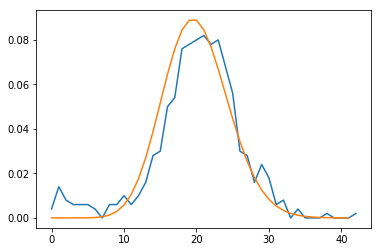

In [27]:
def poisson_3():
    N, L = 10, 1000
    labda = 5
    G = expon(scale=1.0 / (N * labda))
    A = np.cumsum(G.rvs((N, L)), axis=1)  # step 1
    A = np.sort(A.flatten())  # step 2

    mean = 20  # specify the number of arrivals per interval
    bins = N * L // mean  # step 3
    p, x = np.histogram(A, bins)

    P = np.bincount(p)
    P = P / float(P.sum())  # normalize
    support = range(p.min(), p.max())

    plt.plot(P)
    plt.plot(support, scipy.stats.poisson.pmf(support, mean))
    # plt.pause(10)
    plt.show()


poisson_3()
